In [20]:
import pandas as pd
stations = pd.read_csv('data/edata_eng.csv', index_col=0)

In [21]:
stations = stations[stations['total_voters']>100]
stations = stations[stations['total_voters']<10000]
stations = stations[stations['ur']>5]
len(stations)

92018

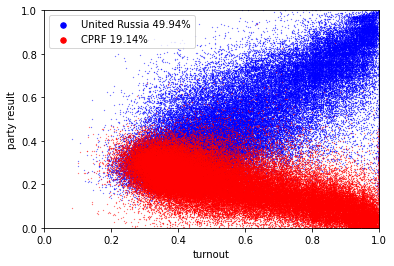

In [22]:
import matplotlib.pyplot as plt
stations['ur_percent'] = stations['ur'] / (stations['voted'])
stations['cprf_percent'] = stations['cprf'] / (stations['voted'])
er_string = str(round(100*stations['ur'].sum()/stations['voted'].sum(),2)) + '%'
cprf_string = str(round(100*stations['cprf'].sum()/stations['voted'].sum(),2))+ '%'
stations['turnout'] = stations['voted']/stations['total_voters']
plt.scatter(stations['turnout'], stations['ur_percent'], color='blue', s=0.05, label="United Russia " + er_string)
plt.scatter(stations['turnout'], stations['cprf_percent'], color='red', s=0.05, label="CPRF " + cprf_string)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.xlabel("turnout")
plt.ylabel("party result")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [23]:
city_stations = pd.read_csv('data/cities_ok_eng.csv', index_col=0)
city_stations['total_voters'].sum()
len(city_stations)

6602

In [24]:
city_stations['total_voters'].sum()

12451827

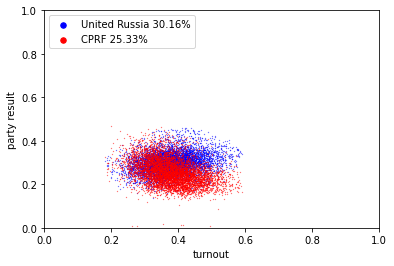

In [25]:
import matplotlib.pyplot as plt
city_stations['ur_percent'] = city_stations['ur'] / (city_stations['voted'])
city_stations['cprf_percent'] = city_stations['cprf'] / (city_stations['voted'])
er_string = str(round(100*city_stations['ur'].sum()/city_stations['voted'].sum(),2)) + '%'
cprf_string = str(round(100*city_stations['cprf'].sum()/city_stations['voted'].sum(),2))+ '%'
city_stations['turnout'] = city_stations['voted']/city_stations['total_voters']
plt.scatter(city_stations['turnout'], city_stations['ur_percent'], color='blue', s=0.05, label="United Russia " + er_string)
plt.scatter(city_stations['turnout'], city_stations['cprf_percent'], color='red', s=0.05, label="CPRF " + cprf_string)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.xlabel("turnout")
plt.ylabel("party result")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

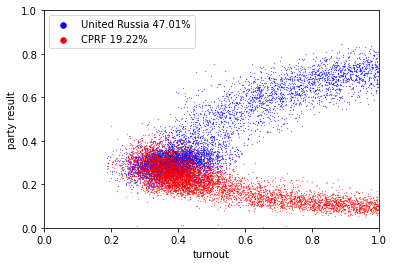

In [26]:
from random import uniform
city_stations = city_stations.sample(frac=1)
city_stations['fraud'] = False

i = 0
ur_percent = city_stations['ur'].sum()/city_stations['voted'].sum()
for index, row in city_stations.iterrows():
    if ur_percent < 0.47:
        total_voters = row['total_voters']
        voted = row['voted']
        max_fraud = total_voters - voted
        min_fraud = max_fraud*0.05
        number = int(uniform(min_fraud, max_fraud))
        city_stations.loc[index, 'ur'] = row['ur'] + number
        city_stations.loc[index, 'voted'] = row['voted'] + number
        city_stations.loc[index,'fraud'] = True
        ur_percent = city_stations['ur'].sum()/city_stations['voted'].sum()

city_stations['turnout'] = city_stations['voted']/city_stations['total_voters']
city_stations['ur_percent'] = city_stations['ur']/city_stations['voted']
city_stations['cprf_percent'] = city_stations['cprf']/city_stations['voted']

er_string = str(round(100*city_stations['ur'].sum()/city_stations['voted'].sum(),2)) + '%'
cprf_string = str(round(100*city_stations['cprf'].sum()/city_stations['voted'].sum(),2))+ '%'
plt.scatter(city_stations['turnout'], city_stations['ur_percent'], color='blue', s=0.05, label="United Russia " + er_string)
plt.scatter(city_stations['turnout'], city_stations['cprf_percent'], color='red', s=0.05, label="CPRF " + cprf_string)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.xlabel("turnout")
plt.ylabel("party result")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

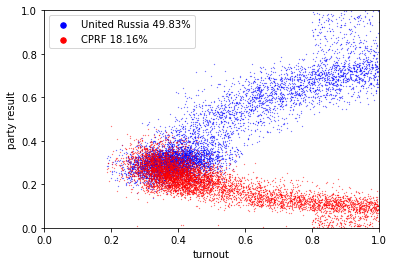

In [27]:
city_stations_change = city_stations[~city_stations['fraud']]
for index, row in city_stations_change.iterrows():
    if ur_percent < 0.4982:
        total_voters = row['total_voters']
        random_voted = int(uniform(total_voters * 0.8, total_voters))
        voted = random_voted
        random_er = int(uniform(random_voted * 0.8, random_voted))
        city_stations.loc[index, 'voted'] = voted
        city_stations.loc[index, 'ur'] = int(random_er)
        city_stations.loc[index, 'cprf'] = int((random_voted - random_er)*0.3)
        city_stations.loc[index, 'fraud'] = True
        ur_percent = city_stations['ur'].sum() / city_stations['voted'].sum()

city_stations['turnout'] = city_stations['voted']/city_stations['total_voters']
city_stations['ur_percent'] = city_stations['ur']/city_stations['voted']
city_stations['cprf_percent'] = city_stations['cprf']/city_stations['voted']

er_string = str(round(100*city_stations['ur'].sum()/city_stations['voted'].sum(),2)) + '%'
cprf_string = str(round(100*city_stations['cprf'].sum()/city_stations['voted'].sum(),2))+ '%'
plt.scatter(city_stations['turnout'], city_stations['ur_percent'], color='blue', s=0.05, label="United Russia " + er_string)
plt.scatter(city_stations['turnout'], city_stations['cprf_percent'], color='red', s=0.05, label="CPRF " + cprf_string)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.xlabel("turnout")
plt.ylabel("party result")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

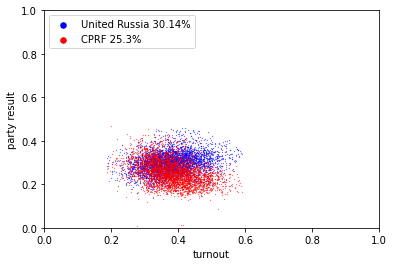

In [28]:
city_stations_ok = city_stations[city_stations['fraud'] == False]
er_string = str(round(100*city_stations_ok['ur'].sum()/city_stations_ok['voted'].sum(),2)) + '%'
cprf_string = str(round(100*city_stations_ok['cprf'].sum()/city_stations_ok['voted'].sum(),2))+ '%'
plt.scatter(city_stations_ok['turnout'], city_stations_ok['ur_percent'], color='blue', s=0.05, label="United Russia " + er_string)
plt.scatter(city_stations_ok['turnout'], city_stations_ok['cprf_percent'], color='red', s=0.05, label="CPRF " + cprf_string)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.xlabel("turnout")
plt.ylabel("party result")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

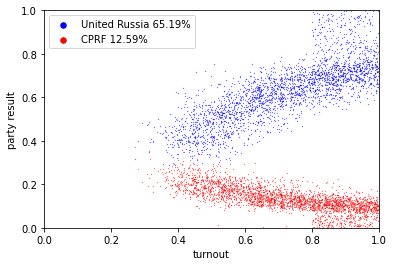

In [29]:
city_stations_fraud = city_stations[city_stations['fraud'] == True]
er_string = str(round(100*city_stations_fraud['ur'].sum()/city_stations_fraud['voted'].sum(),2)) + '%'
cprf_string = str(round(100*city_stations_fraud['cprf'].sum()/city_stations_fraud['voted'].sum(),2))+ '%'
plt.scatter(city_stations_fraud['turnout'], city_stations_fraud['ur_percent'], color='blue', s=0.05, label="United Russia " + er_string)
plt.scatter(city_stations_fraud['turnout'], city_stations_fraud['cprf_percent'], color='red', s=0.05, label="CPRF " + cprf_string)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.xlabel("turnout")
plt.ylabel("party result")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
pipe = Pipeline([("scale", StandardScaler()), ("model", LogisticRegressionCV())])
pipe.get_params()
X = city_stations[['ur','cprf', 'voted','total_voters']]
y = city_stations['fraud']
pipe.fit(X, y)
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', LogisticRegressionCV())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': LogisticRegressionCV(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__Cs': 10,
 'model__class_weight': None,
 'model__cv': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1.0,
 'model__l1_ratios': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__refit': True,
 'model__scoring': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0}

In [31]:
stations['turnout'] = stations['voted']/stations['total_voters']
stations['ur_percent'] = stations['ur']/stations['voted']
stations['cprf_percent'] = stations['cprf']/stations['voted']
Xx = stations[['ur','cprf', 'voted','total_voters']]
prediction = pipe.predict(Xx)
prediction
stations['prediction'] = prediction

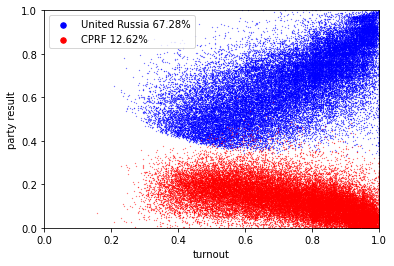

In [32]:
stations_fraud = stations[stations['prediction'] == True]
er_string = str(round(100*stations_fraud['ur'].sum()/stations_fraud['voted'].sum(),2)) + '%'
cprf_string = str(round(100*stations_fraud['cprf'].sum()/stations_fraud['voted'].sum(),2))+ '%'
plt.scatter(stations_fraud['turnout'], stations_fraud['ur_percent'], color='blue', s=0.05, label="United Russia " + er_string)
plt.scatter(stations_fraud['turnout'], stations_fraud['cprf_percent'], color='red', s=0.05, label="CPRF " + cprf_string)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.xlabel("turnout")
plt.ylabel("party result")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

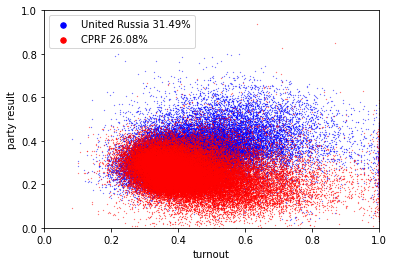

In [33]:
stations_ok = stations[stations['prediction'] == False]
er_string = str(round(100*stations_ok['ur'].sum()/stations_ok['voted'].sum(),2)) + '%'
cprf_string = str(round(100*stations_ok['cprf'].sum()/stations_ok['voted'].sum(),2))+ '%'
plt.scatter(stations_ok['turnout'], stations_ok['ur_percent'], color='blue', s=0.05, label="United Russia " + er_string)
plt.scatter(stations_ok['turnout'], stations_ok['cprf_percent'], color='red', s=0.05, label="CPRF " + cprf_string)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.xlabel("turnout")
plt.ylabel("party result")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [34]:
ur_true = stations_ok['ur'].sum()/stations_ok['voted'].sum()
ur_fraud = stations_fraud['ur'].sum()/stations_fraud['voted'].sum()
round(stations_fraud['voted'].sum()*ur_true/ur_fraud)

12942558

In [35]:
pd.set_option('display.max_rows', 100)
regions = stations['region'].drop_duplicates()
region_result = pd.DataFrame()
stations_map = pd.DataFrame()
i=0
for region in regions:
    i+=1
    region_data = stations[stations['region'] == region]
    region_core_data = stations_ok[stations_ok['region'] == region]
    region_ur_core_percent = round(100*region_core_data['ur'].sum()/region_core_data['voted'].sum(),2)
    region_cprf_core_percent = round(100*region_core_data['cprf'].sum()/region_core_data['voted'].sum(),2)
    region_fraud_data = stations_fraud[stations_fraud['region'] == region]
    region_ur_percent_fraud = round(100*region_fraud_data['ur'].sum()/region_fraud_data['voted'].sum(),2)
    region_ur_percent = round(100*region_data['ur'].sum()/region_data['voted'].sum(),2)
    region_total_voted = region_data['total_voters'].sum()
    availability = round(100*region_core_data['total_voters'].sum()/region_total_voted,2)
    region_data['availability'] = availability
    stations_map = stations_map.append(region_data)
    total = len(region_data)
    fraud = len(region_fraud_data)
    ok = len(region_core_data)
    region_result = region_result.append(pd.DataFrame({'region name':region,'UR percent': region_ur_percent, 'UR core percent' : region_ur_core_percent , 'CPRF core percent' : region_cprf_core_percent , 'Stations with fraud' : fraud, 'Stations without fraud' : ok, 'Availability' : availability}, index=[i]))
region_result.sort_values('Availability')

/var/folders/pv/7q_wjlwn1n7db1pz94vrndqh0000gn/T/ipykernel_2434/4268887340.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pv/7q_wjlwn1n7db1pz94vrndqh0000gn/T/ipykernel_2434/4268887340.py:10: RuntimeWarning:

invalid value encountered in long_scalars

/var/folders/pv/7q_wjlwn1n7db1pz94vrndqh0000gn/T/ipykernel_2434/4268887340.py:11: RuntimeWarning:

invalid value encountered in long_scalars



region name  UR percent  UR core percent  \
78                      Chechen Republic       96.16              NaN   
58                      Republic of Tuva       85.85              NaN   
19       Karachayevo-Circassian Republic       80.06              NaN   
15          Kabardino-Balkarian Republic       79.20            51.43   
56    Republic of North Ossetia – Alania       71.11            21.73   
48                Republic of Ingushetia       85.18            41.10   
52                    Republic of Crimea       63.34            45.68   
81          Yamal-Nenets Autonomous Area       68.94            28.99   
57                 Republic of Tatarstan       78.99            30.25   
47                 Republic of Daghestan       81.52            33.12   
20                       Kemerovo Region       70.74            32.91   
6                         Bryansk Region       64.30            36.82   
54                  Republic of Mordovia       65.89            36.43   
43                   Republic of Adygeya       66.55            38.37   
8                       Volgograd Region       58.41            35.03   
85                            Sevastopol       56.79            44.20   
45             Republic of Bashkortostan       66.57            28.84   
67                   Stavropol Territory       61.83            34.06   
23                   Krasnodar Territory       60.98            33.37   
11              Jewish Autonomous Region       56.31            33.37   
68                         Tambov Region       56.89            32.16   
63                        Saratov Region       59.82            36.79   
71                           Tula Region       52.87            35.96   
72                         Tyumen Region       51.30            30.53   
39                          Penza Region       56.18            34.13   
5                        Belgorod Region       51.62            35.07   
80              Chukotka Autonomous Area       46.86            32.57   
30                         Moscow Region       45.68            31.09   
4                       Astrakhan Region       48.08            31.44   
10                       Voronezh Region       55.88            31.74   
60                         Rostov Region       48.45            31.98   
61                         Ryazan Region       47.71            32.87   
33                Nizhny Novgorod Region       50.69            35.13   
28                        Lipetsk Region       48.63            30.74   
29                        Magadan Region       50.15            32.54   
27                      Leningrad Region       43.08            32.86   
49                  Republic of Kalmykia       39.48            28.65   
46                  Republic of Buryatia       42.52            34.48   
62                         Samara Region       44.25            32.90   
74                      Ulyanovsk Region       38.89            30.30   
26                          Kursk Region       43.01            36.80   
16                    Kaliningrad Region       41.17            33.71   
44                     Republic of Altai       38.48            33.85   
76  Khanty-Mansi Autonomous Area – Yugra       42.30            30.77   
38                           Orel Region       38.82            30.98   
37                       Orenburg Region       38.29            32.34   
79                      Chuvash Republic       37.15            31.29   
41                    Primorye Territory       37.33            27.36   
42                          Pskov Region       40.04            35.85   
55           Republic of Sakha (Yakutia)       33.12            28.47   
66                       Smolensk Region       39.93            34.00   
17                         Kaluga Region       36.26            33.39   
73                    Udmurtian Republic       35.60            32.31   
84                        St. Petersburg       34.98            30.65   
64            

In [36]:
import plotly.express as px
fig = px.scatter_mapbox(stations_map, #our data set
                        lat="lat",
                        lon="lon",
                        color="availability",
                        range_color = (0,100),
                        zoom=2,
                        width=1200, height=800,
                        center = {'lat':60,'lon':105},
                        title =  'Availability - percentage of population in a region that has access to  voting stations with proper election results registration')
fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(marker=dict(size=3))
fig.show(config={'scrollZoom': True})